**Bootstrapping** is one of the re-sampling methods. It is often used as an alternative to statistical inference based on the assumption of a parametric model when that assumption is in doubt, or where parametric inference is impossible or requires complicated formulas for the standard errors. Also used for constructing hypothesis tests, confidence intervals of a population parameter like a mean, median, proportion.

let's see how to get confidence intervals of a population parameter(**Mean** in our case) using bootstrapping

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
population_ = np.random.normal(30,10,1500)
np.mean(population_)

29.640893898631433

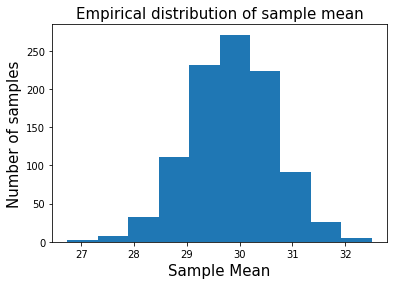

90.0% confidence interval for population mean is 28.54 and 31.20


In [3]:
sample_ = np.random.choice(population_,150) # Sampled 10 % of the population

# configure bootstrap
n_iterations = 1000 #it should be large (typically 1,000 or 10,000 times)
n_size = int(len(sample_))

# run bootstrap
bootstrap_mean_estimates = list()

for i in range(n_iterations):
    #Bootstrap sample
    s = np.random.choice(sample_, size=n_size); #Sampled(SRSWR) from sample.
    m = np.mean(s);
    bootstrap_mean_estimates.append(m)

# plotting the sampling distribution of the statistic(mean)
plt.hist(bootstrap_mean_estimates)
plt.title("Empirical distribution of sample mean",size=15)
plt.xlabel("Sample Mean",size=15)
plt.ylabel("Number of samples",size=15)
plt.show()

# confidence intervals
alpha = 0.90
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(bootstrap_mean_estimates, p)

p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(bootstrap_mean_estimates, p)
print('{0:.1f}% confidence interval for population mean is {1:.2f} and {2:.2f}'.format(alpha*100, lower, upper))

# Method - 2

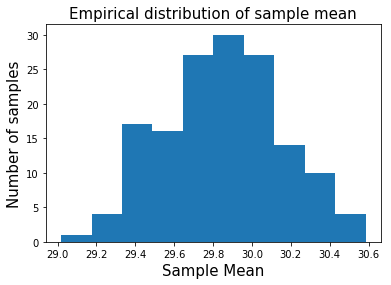

In [4]:
s = np.random.choice(sample_, size=(n_iterations,n_size)) # just modified the size
bootstrap_mean_estimates=s.mean(axis=0)
plt.hist(bootstrap_mean_estimates)
plt.title("Empirical distribution of sample mean",size=15)
plt.xlabel("Sample Mean",size=15)
plt.ylabel("Number of samples",size=15)
plt.show()

Bootstrap is mainly recommended for distribution estimation. The bootstrap can be applied to **both** variance and distribution estimation problems. However, the bootstrap variance estimator is not as good as the **jackknife** variance estimator in terms of the empirical results.

Note: jackknifing is also one of the re-sampling methods